<a href="https://colab.research.google.com/github/omkar806/Final_year_project/blob/main/Music_Mood_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the Libraries
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv("happy_sad_updated.csv")

# Split data into features and target
X = data.drop(columns=['song_emotion'])
y = data['song_emotion']

In [3]:
# Shuffle and split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500, stratify=y)


In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Reshape input for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [6]:
# One-hot encode target labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [7]:
# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.01),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.10),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')  # Assuming 2 emotions (Happy and Sad)
])

In [8]:
# Compile model
optimizer = Adam(learning_rate=0.001)  # Specify learning rate directly
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [10]:
# Train model
history = cnn_model.fit(X_train_reshaped, y_train_encoded, epochs=200, batch_size=64, validation_split=0.1, callbacks=[reduce_lr])

Epoch 1/200
23/23 [==============================] - 6s 29ms/step - loss: 0.6215 - accuracy: 0.6300 - val_loss: 0.5654 - val_accuracy: 0.6879 - lr: 0.0010
Epoch 2/200
23/23 [==============================] - 0s 6ms/step - loss: 0.5589 - accuracy: 0.6853 - val_loss: 0.5584 - val_accuracy: 0.7197 - lr: 0.0010
Epoch 3/200
23/23 [==============================] - 0s 6ms/step - loss: 0.5461 - accuracy: 0.6995 - val_loss: 0.5502 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 4/200
23/23 [==============================] - 0s 6ms/step - loss: 0.5245 - accuracy: 0.7201 - val_loss: 0.5469 - val_accuracy: 0.7261 - lr: 0.0010
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 0.5205 - accuracy: 0.7186 - val_loss: 0.5536 - val_accuracy: 0.7197 - lr: 0.0010
Epoch 6/200
23/23 [==============================] - 0s 6ms/step - loss: 0.5210 - accuracy: 0.7321 - val_loss: 0.5462 - val_accuracy: 0.7070 - lr: 0.0010
Epoch 7/200
23/23 [==============================] - 0s 6ms/step - loss: 0.

In [11]:
# Evaluate model on test Dataset
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print("CNN Accuracy:",cnn_accuracy)

CNN Accuracy: 0.7277353405952454


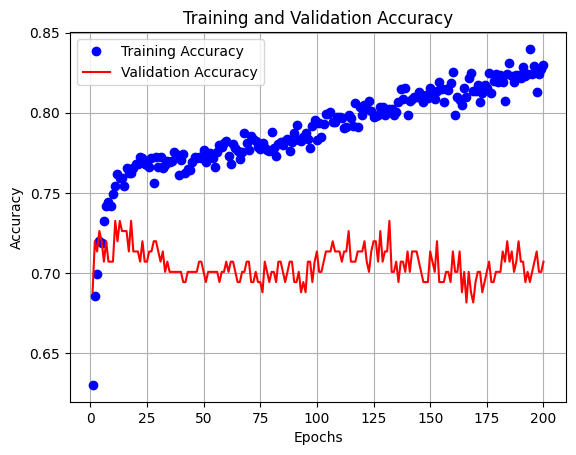

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Save model
cnn_model.save("emotion_classifier_3.keras")